Name: Bálint János Prágai

Neptun-code: VG9K5C

As I passed my first practice midterm I'm not obligated to submit a report of this project in a PDF format according to the Final Project Assignment description.

### Imported libraries

These will be the libraries that we'll be mainly using. Later in the notebook I'll use sklearn aswell, but no need to import the whole library and I'll only import sub-libraries once I need them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-v0_8')


The cells below are the install cells, only use these, if you don't have these packages installed.

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing the data

As the original raw data from [KEEL](https://sci2s.ugr.es/keel/dataset_smja.php?cod=1459) comes in a ".dat" format, I opted to go to the original [UCI source](https://archive.ics.uci.edu/dataset/10/automobile) (linked on the KEEL website) for the data.

Here we can find the lines of code stated in the cell below if we press the button "IMPORT IN PYTHON". Please do not run this cell.

It imports the database in some unique format, that gives us a lot of metadata, thus some insight into the data, but it is not ideal to work with and feels a bit like cheating.

Instead, I downloaded it and made a txt file out of 2 files found in the zip:
- imports-85.data (for the data)
- imports-85.NAMES (for column names)

We'll now read the txt file to begin our EDA process.

In [4]:
#Please don't run this cell, if you can see the output of it, as it redefines a lot of variables I plan on using later!


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = df.data.features 
y = df.data.targets 
  
# metadata 
print(df.metadata) 
  
# variable information 
print(df.variables) 

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

### The EDA starts here

In [5]:
autoDataRaw = pd.read_csv("D:/data/auto_data/imports-85.txt")
# autodata_raw = pd.read_csv("./imports-85.txt") This line is here to use for you, paste on the dot whichever filepath you have the file in.
autoDataRaw

#no point in looking at the head or tail of the df, 
#as the scalable element we get here tells us enough information combined with the metadata 
#from the source. It also gives us the shape which is 205 rows x 26 columns

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Let's have the column names for later use.

In [6]:
colsList = autoDataRaw.columns.tolist()
print(colsList)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


Let's check the unique values for each column, so we can get an idea about how the missing values are treated.

In [7]:
for col in autoDataRaw:
    if autoDataRaw[col].dtype == 'O':
        print(col, autoDataRaw[col].unique())

normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' '?']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
engine-type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
bore ['3.47' '2.68' '3.19' '3.13' '3.50' 

As we can see, missing values are indicated by a "?" wherever they are present.
Now we can look for the missing values in each column! We can see, that mostly numeric columns have missing values, only exception being 'num-of-doors', we'll deal with that later.

In [8]:
# We don't have to look for the "?" symbol directly in numeric cols, it is enough, to find the non-numeric values.
# List of columns that are supposed to contain numeric data according to the source/metadata
numeric_cols = ['symboling','normalized-losses','wheel-base','length', 'width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

print("Count of missing data in each column:")
for col in numeric_cols:
    if(pd.to_numeric(autoDataRaw[col],errors='coerce').isnull().sum() > 0):
        print(col + ": " + str(pd.to_numeric(autoDataRaw[col],errors='coerce').isnull().sum()))

Count of missing data in each column:
normalized-losses: 41
bore: 4
stroke: 4
horsepower: 2
peak-rpm: 2
price: 4


In [9]:
#Aaaaand just to prove my claim in my previous code-cell:

print("List of columns that contain a '?' for missing data:")
colslist = list(autoDataRaw.columns)
for col in colslist:
    if('?' in autoDataRaw[col].value_counts()):
        print(col + " - " + str(autoDataRaw[col].value_counts()['?']))

List of columns that contain a '?' for missing data:
normalized-losses - 41
num-of-doors - 2
bore - 4
stroke - 4
horsepower - 2
peak-rpm - 2
price - 4


So we need to deal with missing values in 
1. normalized-losses
2. price
3. bore
4. horsepower
5. stroke

After these we'll see how we should deal with peak_rpm and num-of-doors.

Let's start with **normalized-losses**, as it has the most values missing. We properly convert the data here to numeric and place NaNs in the place of the '?'-s. I'll suppose, that cars of the same make (same brand) will have similar normalized-losses, so where there are enough instances of not-NaNs (suppose more than 50% of the same brand have this value existent) I will replace the NaNs with the mean value. I'll discard everything else for the analysis (aka instances with NaNs still remaining).

In [10]:
#Replacement of '?' characters
carsnl = autoDataRaw
carsnl['normalized-losses'] = pd.to_numeric(carsnl['normalized-losses'],errors='coerce')
carsnl

#Finding NaNs, grouped under makes/brands
carsNaN = carsnl[carsnl['normalized-losses'].isnull()].groupby(by = 'make', as_index = False).size()
carsNaN.columns=['make', 'nanscount']

#Collecting how many instances we have of each make/brand
carsBrand = carsnl.groupby(by = 'make', as_index = False).size()
carsBrand.columns = ['make', 'makecount']
carsBrandNaN = carsBrand.merge(carsNaN,on = "make", how = "left", suffixes = ['', '_right'])

#Finding brands that have enough non-NaN instances
meanNaNBrands = carsBrandNaN[carsBrandNaN['nanscount'] * 100 / carsBrandNaN['makecount'] < 50]
meanNaNBrands['nl2replace'] = meanNaNBrands['make']

#Calculating mean-normalized-loss
nlCars = carsnl.merge(meanNaNBrands, on = "make", how = "left", suffixes = ['','_right'])
nlMeanBrands = nlCars.groupby(by = 'nl2replace')['normalized-losses'].mean()

#Replacing NaNs with means
carsReplace = carsnl.merge(nlMeanBrands, how = "left", left_on = "make", right_on = "nl2replace", suffixes = ['', '_right'])

#np.where(carsReplace['normalized-losses'].isnull(), carsReplace['normalized-losses_right'], carsReplace['normalized-losses'])
carsReplace['normalized-losses'] = np.where(carsReplace['normalized-losses'].isnull(), carsReplace['normalized-losses_right'], carsReplace['normalized-losses'])

autoDataClean = carsReplace.loc[carsReplace["normalized-losses"].isnull() == False].copy()

print("Count of normalized-losses after cleaning: " + str(autoDataClean['normalized-losses'].count()))



Count of normalized-losses after cleaning: 185


C:\Users\Prágai Bálint\AppData\Local\Temp\ipykernel_5448\2800457025.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meanNaNBrands['nl2replace'] = meanNaNBrands['make']


We have 189 values after cleaning.

Now we start to deal with **price**. The best way to deal with missing values (as we only have 4) here is to calculate an average for each make and use that.

In [11]:
autoDataClean["price"] = pd.to_numeric(autoDataClean["price"], errors = 'coerce')
meanPriceBrand = autoDataClean.groupby(by =  ['make'])['price'].mean()
meanPriceBrand = meanPriceBrand.reset_index()

#Merge to cleaned DF
autoDataClean = autoDataClean.merge(meanPriceBrand, on = 'make', suffixes = ['', '_right'])
autoDataClean['price'] = np.where(autoDataClean['price'].isnull(), autoDataClean['price_right'], autoDataClean['price'])
#autoDataClean[['make','price']]

Let's continue with **horsepower**, we are converting it to numeric values.

In [12]:
autoDataClean['horsepower'] = pd.to_numeric(autoDataClean['horsepower'], errors = 'coerce')
#autoDataClean

Let's drop all temporary columns, that we created here, as well as drop the instances, that have the number of doors missing.

In [13]:
del autoDataClean['normalized-losses_right']
del autoDataClean['price_right']
autoDataClean = autoDataClean[autoDataClean['num-of-doors'] != '?']
#dropping 2 additional rows

In [14]:
autoDataClean

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
2,2,161.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
3,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
4,1,161.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
181,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
182,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
183,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


We have 2 columns, that have numeric values, but in string format (e.g. 'two', 'four'). Let us convert these two columns:
1. num-of-doors
2. num-of-cylinders

In [15]:
def convNumDoors(numbString):
    match numbString:
        case "two":
            return 2
        case "four":
            return 4
        case _:
            return 0

#now I know this probably isn't the most efficient way to write this function, 
#but I really wanted to see, how this new (as of Python 3.10) match case structure performs.

def convNumCyl(numbString):
    cyls = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
    if(numbString in cyls.keys()):
        return cyls[numbString]
    return 0

autoDataClean["num-of-doors"] = autoDataClean["num-of-doors"].apply(lambda x: convNumDoors(x))
autoDataClean["num-of-cylinders"] = autoDataClean["num-of-cylinders"].apply(lambda x: convNumCyl(x))


So this dataset is based on United State measures, and as a European, I don't understand those numbers. The engine size is in cubic inches, I'll convert that into cubic centimeters. (For that we need to divide by 0.061024)

In [16]:
autoDataClean["engine-size-cc"] = autoDataClean["engine-size"].apply(lambda x: int(x/0.061024))

Probably also a good idea to calculate the power to weight ratio of vehicles, to show the performance of the car.

In [17]:
autoDataClean["power-2-weight-ratio"] = pd.to_numeric(autoDataClean["horsepower"], errors = "coerce") / autoDataClean["curb-weight"]

Now we can deal with **bore** and **stroke** . These both has minimal missing values (4 and 4).

In [18]:
autoDataClean = autoDataClean[autoDataClean["bore"] != '?']
autoDataClean = autoDataClean[autoDataClean["stroke"] != '?']
autoDataClean.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price,engine-size-cc,power-2-weight-ratio
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.748603,122.805719,3.195531,99.011732,173.887709,65.859777,53.979888,2525.284916,4.312849,123.575419,10.228603,98.810056,25.865922,31.296089,12247.956238,2024.474860,0.038683
std,1.217123,34.716002,0.983448,5.963421,12.411809,2.098194,2.341237,510.701041,0.815856,36.517945,4.113317,32.326072,6.258828,6.752156,6771.661126,598.476186,0.007547
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,3.000000,61.000000,7.000000,48.000000,14.000000,16.000000,5118.000000,999.000000,0.019936
25%,0.000000,95.000000,2.000000,94.500000,166.300000,64.000000,52.250000,2125.000000,4.000000,97.000000,8.600000,70.000000,21.000000,25.000000,7609.000000,1589.000000,0.034057
50%,1.000000,118.000000,4.000000,97.200000,173.200000,65.400000,54.100000,2403.000000,4.000000,110.000000,9.000000,92.000000,26.000000,31.000000,9960.000000,1802.000000,0.037429
75%,2.000000,150.000000,4.000000,102.400000,183.300000,66.500000,55.700000,2930.500000,4.000000,141.000000,9.400000,116.000000,31.000000,37.000000,15720.000000,2310.000000,0.043545
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,8.000000,308.000000,23.000000,200.000000,49.000000,54.000000,45400.000000,5047.000000,0.063715


After all these transformations we should check if there are any '?' missing values left.
Let's check it columnwise.

In [19]:
colsListNew = list(autoDataClean.columns)
for col in colsListNew:
    if('?' in autoDataClean[col].value_counts()):
        print(col + " - " + str(autoDataRaw[col].value_counts()['?']))

According to this there are no missing values left.

There is one more concern: readability. The drive-wheels column has '4wd', 'fwd', 'rwd' for values.
We can replace them by '4 Wheel Drive'; 'Front Wheel Drive'; 'Rear Wheel Drive'

In [20]:
autoDataClean.loc[autoDataClean["drive-wheels"] == '4wd', "drive-wheels"] = '4 Wheel Drive'
autoDataClean.loc[autoDataClean["drive-wheels"] == 'fwd', "drive-wheels"] = 'Front Wheel Drive'
autoDataClean.loc[autoDataClean["drive-wheels"] == 'rwd', "drive-wheels"] = 'Rear Wheel Drive'
#autoDataClean.head()

With that we cleaned the data, let's save it into a CSV file and work further with this.

In [21]:
autoDataClean.to_csv('D:/data/auto_data/auto_data_cleaned.csv')
#autoDataClean.to_csv('./auto_data_cleaned.csv')
#again, use the commented line for your file structure and comment my line

### Cleaned data analysis
Now that we have cleaned the data and have some insight into the dataset by the virtues of the metadata and the summaries, we can analize the data more in-depth.

In [22]:
df = pd.read_csv('D:/data/auto_data/auto_data_cleaned.csv', index_col = 0)
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,engine-size-cc,power-2-weight-ratio
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.748603,122.805719,3.195531,99.011732,173.887709,65.859777,53.979888,2525.284916,4.312849,123.575419,3.314190,3.257151,10.228603,98.810056,5095.251397,25.865922,31.296089,12247.956238,2024.474860,0.038683
std,1.217123,34.716002,0.983448,5.963421,12.411809,2.098194,2.341237,510.701041,0.815856,36.517945,0.266845,0.307979,4.113317,32.326072,468.972482,6.258828,6.752156,6771.661126,598.476186,0.007547
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,3.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000,999.000000,0.019936
25%,0.000000,95.000000,2.000000,94.500000,166.300000,64.000000,52.250000,2125.000000,4.000000,97.000000,3.140000,3.130000,8.600000,70.000000,4800.000000,21.000000,25.000000,7609.000000,1589.000000,0.034057
50%,1.000000,118.000000,4.000000,97.200000,173.200000,65.400000,54.100000,2403.000000,4.000000,110.000000,3.270000,3.290000,9.000000,92.000000,5200.000000,26.000000,31.000000,9960.000000,1802.000000,0.037429
75%,2.000000,150.000000,4.000000,102.400000,183.300000,66.500000,55.700000,2930.500000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,31.000000,37.000000,15720.000000,2310.000000,0.043545
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,8.000000,308.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,45400.000000,5047.000000,0.063715


In [23]:
df.columns.size

28

Let's analyse the variables, that are:
1. symboling - numerical, categorical, ordinal
2. normalized-losses - numeric, continous
3. make - text, categorical
4. num-of-doors - numeric, categorical, ordinal (we converted it from text to numerical in the previous section)
5. body-style - text, categorical
6. height - numeric, continous
7. engine-size-cc - numeric, continous (derived from engine-size)
8. drive-wheels - text, categorical
9. wheel base - numeric, continous
10. bore - numeric, continous
11. stroke - numeric, continous
12. horsepower - numeric, continous
13. city-mpg - numeric, continous
14. price - numeric, continous
15. num-of-cylinders - numeric, categorical, ordinal (we converted it from text to numerical in the previous section)
16. curb-weight - numeric, continous

But first I'll map out a few common charting parameters:


In [24]:
#colours
plot_color = "#de4d78"
title_color = "#3b2466"

#spacings
y_title_margin = 1.0
left   =  0.10
right  =  0.95
bottom =  0.1
top    =  0.5
wspace =  0.1
hspace = 0.6

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

#set seaborn style template
sns.set_style("whitegrid") 

<Figure size 800x550 with 0 Axes>

C:\Users\Prágai Bálint\AppData\Local\Temp\ipykernel_5448\3264490882.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  makeHist.set_xticklabels(makeHist.get_xticklabels(), rotation = 90)


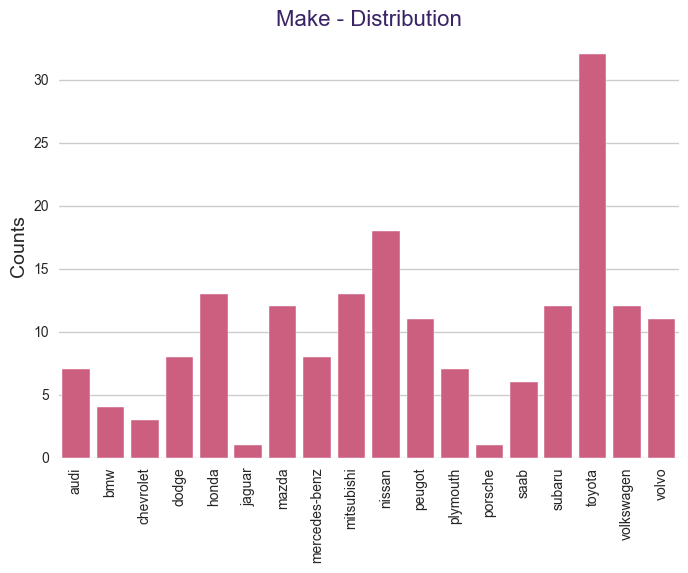

In [25]:
makeHist = sns.countplot(x = df['make'], color = plot_color)
makeHist.set_xticklabels(makeHist.get_xticklabels(), rotation = 90)
makeHist.set_xlabel('')
makeHist.set_ylabel('Counts', fontsize = 14)

ax = makeHist.axes
ax.patch.set_alpha(0)
ax.set_title('Make - Distribution', fontsize = 16, color = title_color)

fig1 = makeHist.get_figure()
fig1.figsize = (10,5)
fig1.patch.set_alpha(0)
fig1.savefig('01make_distribution.png', dpi = fig1.dpi, bbox_inches = 'tight')

Here we can see, that toyota has the highest number of models and jaguar and porsche are tied for last place. (That's not suprising, they are sport and luxury car manifacturers)

### Symboling and Normalized losses

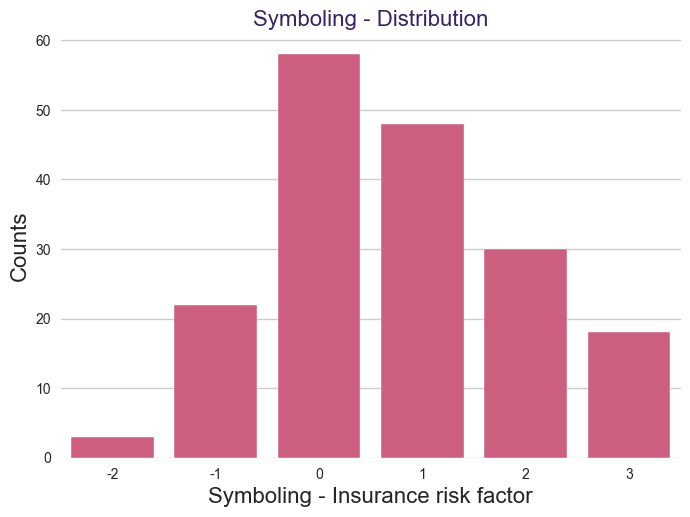

In [26]:
symbHist = sns.countplot(x = df['symboling'], color = plot_color)
#symbHist.set_xticklabels(symbHist.get_xticklabels(), rotation = 90)
symbHist.set_xlabel('Symboling - Insurance risk factor', fontsize = 16)
symbHist.set_ylabel('Counts', fontsize = 16)

ax = symbHist.axes
ax.patch.set_alpha(0)
ax.set_title('Symboling - Distribution', y = y_title_margin, fontsize = 16, color = title_color)

fig2 = symbHist.get_figure()
fig2.patch.set_alpha(0)
fig2.savefig('02symboling_distribution.png', dpi = fig2.dpi, bbox_inches = 'tight')

The above figure shows, how symboling values are distributed in the dataset. According to [the dataset's page](https://sci2s.ugr.es/keel/dataset_smja.php?cod=1459): 

"A value of +3 indicates that the auto is risky, -2 that it is probably pretty safe."

We're gonna work under this assumption. From the figure above we can see, that most of the vehicles are on the riskier side of the spectrum.

### Body style, Number of doors and Drive wheels

C:\Users\Prágai Bálint\AppData\Local\Temp\ipykernel_5448\3573817955.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bodyStyleDist.set_xticklabels(bodyStyleDist.get_xticklabels(), rotation = 45, fontsize = 14)
C:\Users\Prágai Bálint\AppData\Local\Temp\ipykernel_5448\3573817955.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  driveWheelsDist.set_xticklabels(driveWheelsDist.get_xticklabels(), rotation = 45, fontsize = 14)


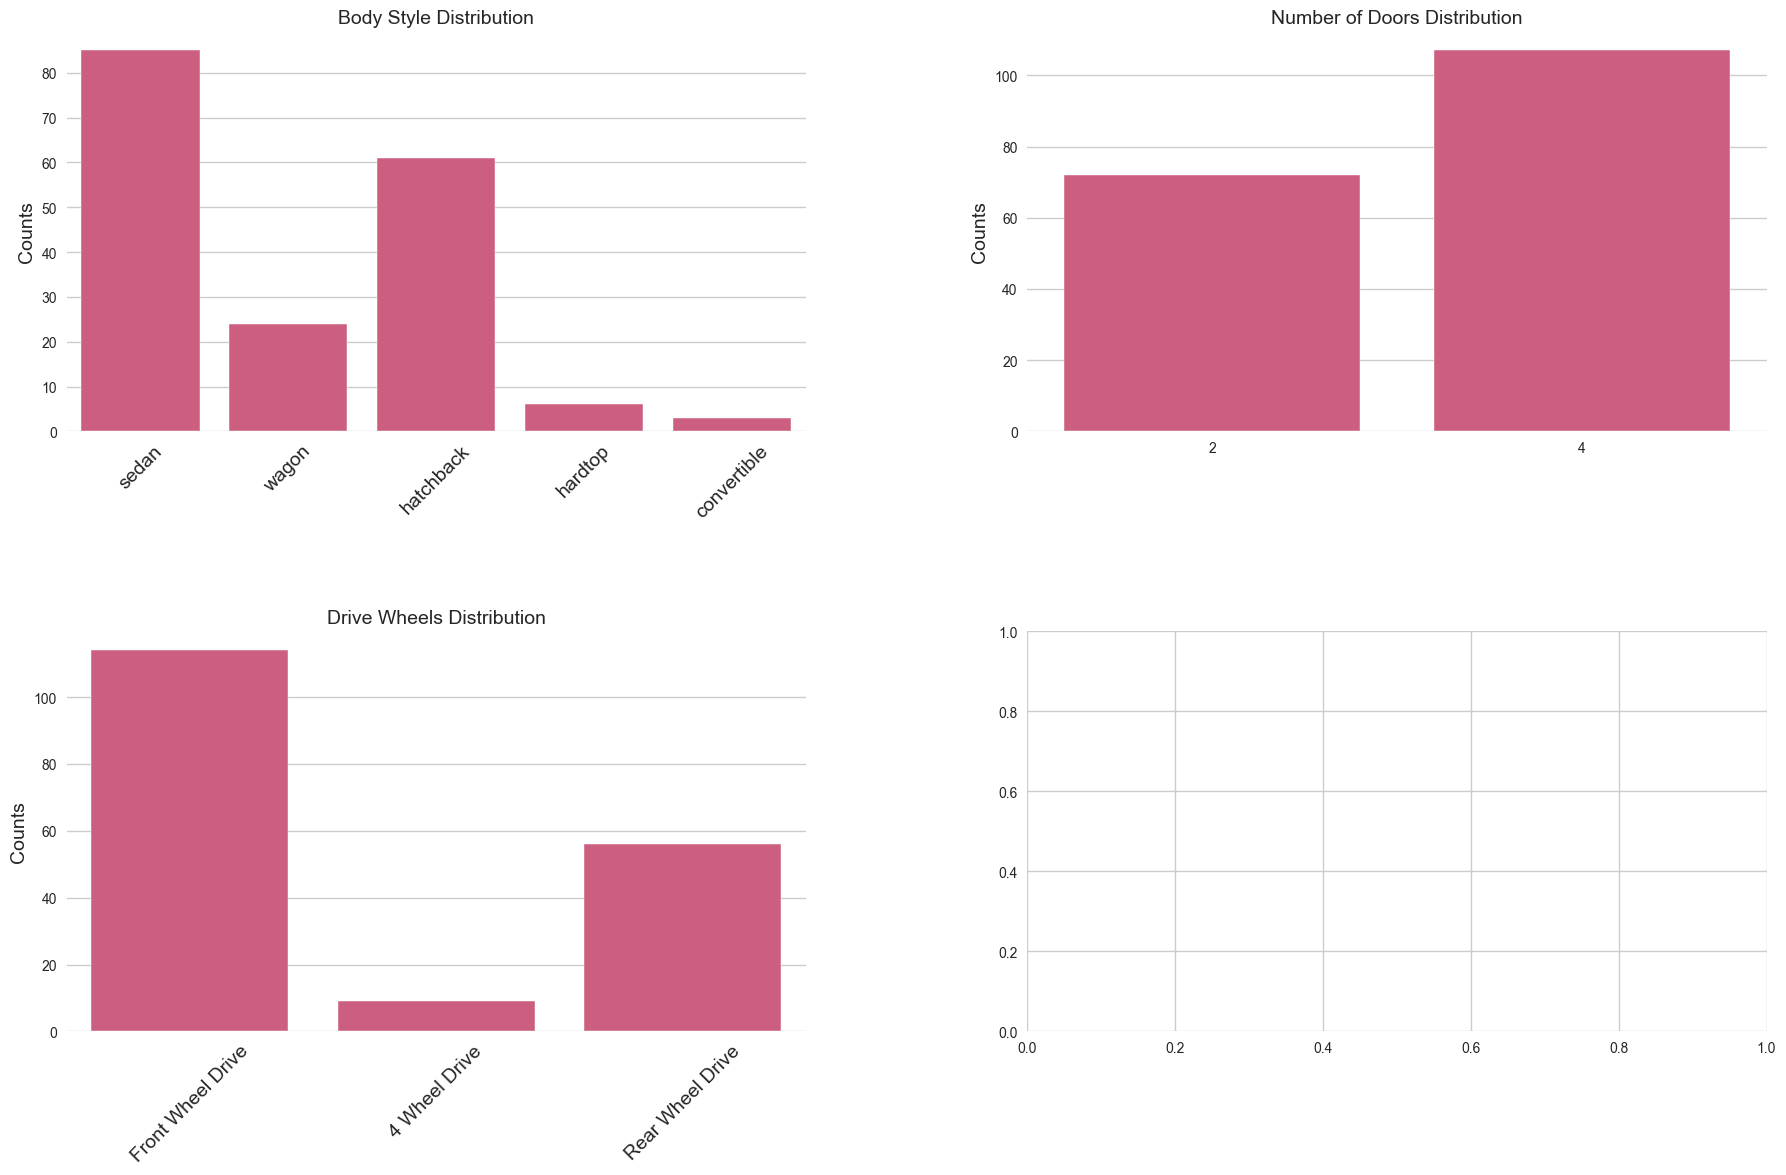

In [27]:
# Lots of info here, so it is best to use subplots for visuals
fig3, ax = plt.subplots(figsize=(20,20), ncols=2, nrows=2)

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  0.6, 
    wspace  =  0.3, 
    hspace  =  0.5
)

fig3.patch.set_alpha(0.5)

ax[0][0].set_title('Body Style Distribution', fontsize = 14)
ax[0][0].set_alpha(0)

bodyStyleDist = sns.countplot(x = df['body-style'], color = plot_color, ax = ax[0][0])
bodyStyleDist.set_xticklabels(bodyStyleDist.get_xticklabels(), rotation = 45, fontsize = 14)
bodyStyleDist.set_xlabel('')
bodyStyleDist.set_ylabel('Counts', fontsize = 14)

ax[0][1].set_title('Number of Doors Distribution', fontsize = 14)
ax[0][1].set_alpha(0)

numDoorsDist = sns.countplot(x = df['num-of-doors'], color = plot_color, ax = ax[0][1])
numDoorsDist.set_xlabel('')
numDoorsDist.set_ylabel('Counts', fontsize = 14)

ax[1][0].set_title('Drive Wheels Distribution', fontsize = 14)
ax[1][0].set_alpha(0)

driveWheelsDist = sns.countplot(x = df['drive-wheels'], color = plot_color, ax = ax[1][0])
driveWheelsDist.set_xticklabels(driveWheelsDist.get_xticklabels(), rotation = 45, fontsize = 14)
driveWheelsDist.set_xlabel('')
driveWheelsDist.set_ylabel('Counts', fontsize = 14)

fig3.savefig('03categorical_vars_distribution.png', dpi = fig3.dpi, bbox_inches = 'tight')

We can see, that there are a lot of sedans, relatively followed by hatchbacks. This correlates well with the fact, that there are more 4 doored vehicles, then there are 2 doored. These cars are also likely to be front wheel driven, so no surprises here.

### Normalized losses

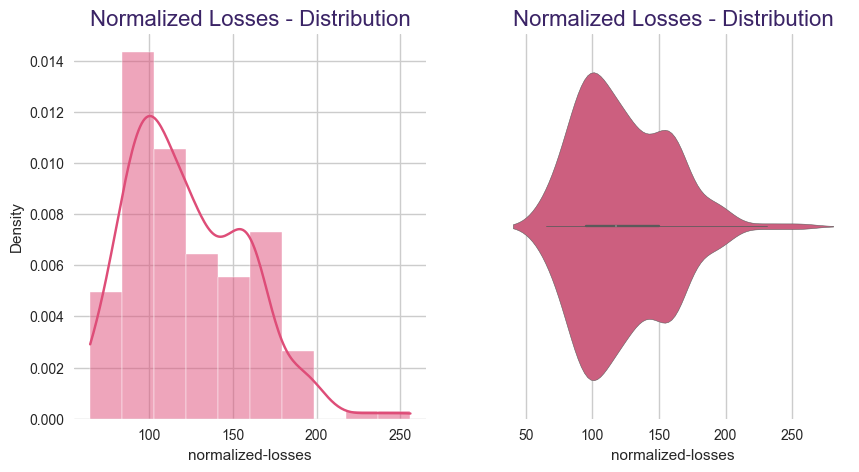

In [28]:
fig4, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig4.patch.set_alpha(0)

ax[0].set_title("Normalized Losses - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

normLossHist = sns.histplot(x = df["normalized-losses"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Normalized Losses - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
normLossViol = sns.violinplot(x = df["normalized-losses"], color = plot_color, ax = ax[1])

#plt.show()
fig4.savefig('04normalized_losses_distribution.png', dpi = fig4.dpi, bbox_inches = 'tight')

In [29]:
df["normalized-losses"].describe()

count    179.000000
mean     122.805719
std       34.716002
min       65.000000
25%       95.000000
50%      118.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

Reading the violin plot we can see, that there is an outlier on the high-value side. We'll be watching out for that.

### Wheel-base
Wheel base is the distance between the front and back wheels of a vehicle, measured from axle to axle. A sedan type car normally has a longer wheel base compared to a hatchback.

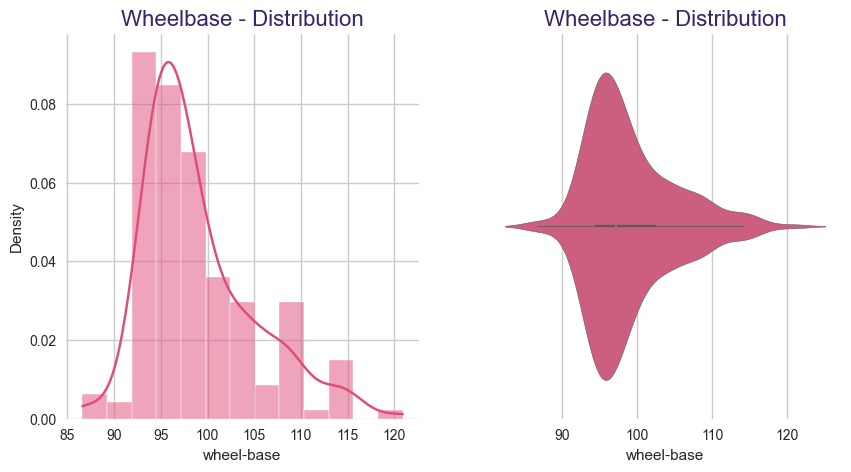

In [30]:
fig5, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig5.patch.set_alpha(0)

ax[0].set_title("Wheelbase - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

wheelBaseHist = sns.histplot(x = df["wheel-base"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Wheelbase - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
normLossViol = sns.violinplot(x = df["wheel-base"], color = plot_color, ax = ax[1])

#plt.show()
fig5.savefig('05wheelbase_distribution.png', dpi = fig5.dpi, bbox_inches = 'tight')

In [31]:
df["wheel-base"].describe()

count    179.000000
mean      99.011732
std        5.963421
min       86.600000
25%       94.500000
50%       97.200000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

The mean is roughly 99, so most of the cars have their wheel bases on and around the mean. However, there is a sharp fall-off on the left side of the mean, so this indicates both that values under ~93 are scarce and that this is a positively skewed distribution, as there is no sharp falloff on the right side.

We can also see from the violin plot, that there are outliers on the higher end.

### Height

Vehicle height is continous in our consideration. It impacts the dynamics of the vehicle pretty significantly (this claim is not based on the dataset, rather than is based on general understanding of physics.)

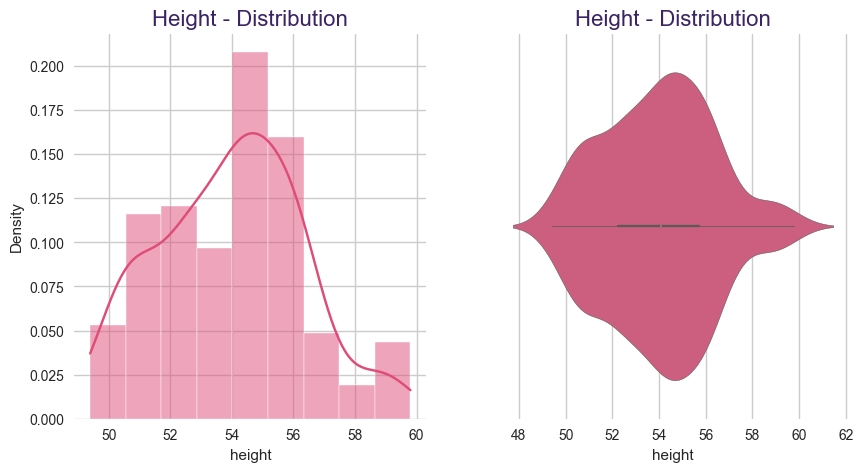

In [32]:
fig6, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig6.patch.set_alpha(0)

ax[0].set_title("Height - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

heightHist = sns.histplot(x = df["height"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Height - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
heightViol = sns.violinplot(x = df["height"], color = plot_color, ax = ax[1])

#plt.show()
fig6.savefig('06height_distribution.png', dpi = fig6.dpi, bbox_inches = 'tight')

In [33]:
df["height"].describe()

count    179.000000
mean      53.979888
std        2.341237
min       49.400000
25%       52.250000
50%       54.100000
75%       55.700000
max       59.800000
Name: height, dtype: float64

Once again, majority of the cars have the height near the mean value. We can also see a sharp drop in numbers towards the higher end. this means, that there aren't many vehicles significantly taller then the median. We can also assume higher vehicles be of the bigger type of vehicles, like convertibles and wagons. Shorter vehicles are can be sportcars.

### Engine size

Engine size (engine-size-cc) denotes the max volume of all cylinders in the engine combined (in cubic centimeters). As a general rule, a bigger engine denotes a higher volume of fuel and air intake and hance generated more power.

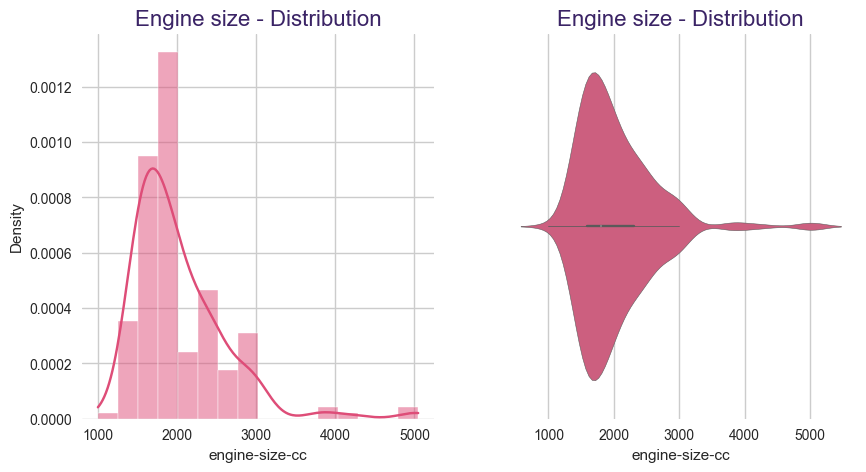

In [34]:
fig7, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig7.patch.set_alpha(0)

ax[0].set_title("Engine size - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

heightHist = sns.histplot(x = df["engine-size-cc"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Engine size - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
heightViol = sns.violinplot(x = df["engine-size-cc"], color = plot_color, ax = ax[1])

#plt.show()
fig7.savefig('07enginesize_distribution.png', dpi = fig7.dpi, bbox_inches = 'tight')

In [35]:
# Okay this is a bit hard to read just by looking at it.
print("Mode of engine size: " + str(df["engine-size-cc"].mode()[0]))
print(df["engine-size-cc"].describe())

Mode of engine size: 1507
count     179.000000
mean     2024.474860
std       598.476186
min       999.000000
25%      1589.000000
50%      1802.000000
75%      2310.000000
max      5047.000000
Name: engine-size-cc, dtype: float64


We can see, that the distribution at hand is positively skewed. Smaller sized engines seem to populate the largest protion of our dataset. Most of them fall into the 1500-2000 cc category, even though the mean is ~2024 cc.

We can also see from the plots, that there are outlier high capacity engines too.

### Bore

The bore is the diameter of the cylinder in which the pistons in the engine move.

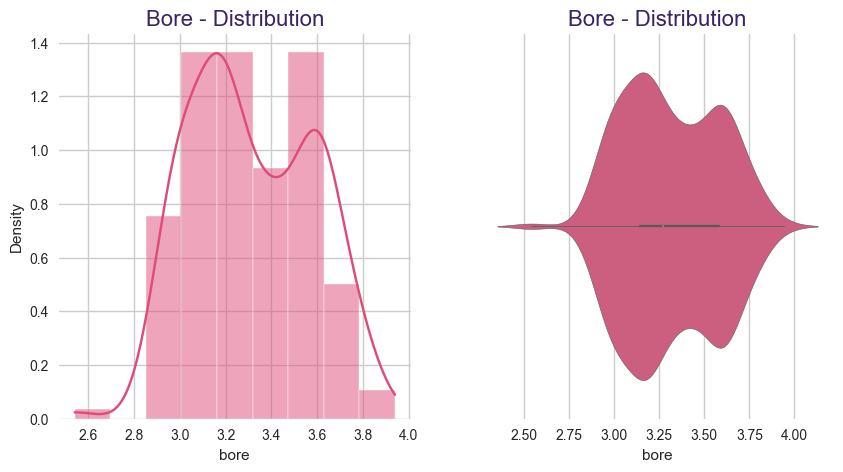

In [36]:
fig8, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig8.patch.set_alpha(0)

ax[0].set_title("Bore - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

boreHist = sns.histplot(x = df["bore"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Bore - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
boreViol = sns.violinplot(x = df["bore"], color = plot_color, ax = ax[1])

#plt.show()
fig8.savefig('08bore_distribution.png', dpi = fig8.dpi, bbox_inches = 'tight')

In [37]:
print("Mode of bore: " + str(df["bore"].mode()[0]))
print(df["bore"].describe())

Mode of bore: 3.19
count    179.000000
mean       3.314190
std        0.266845
min        2.540000
25%        3.140000
50%        3.270000
75%        3.580000
max        3.940000
Name: bore, dtype: float64


There are 2 peaks, one is around 3.19 and the other is ~3.62. The values seem to concentrate around these.

### Stroke

Stroke is the distance travelled by the piston each cycle. The length of the stroke and the bore diameter together determine the engine's displacement.

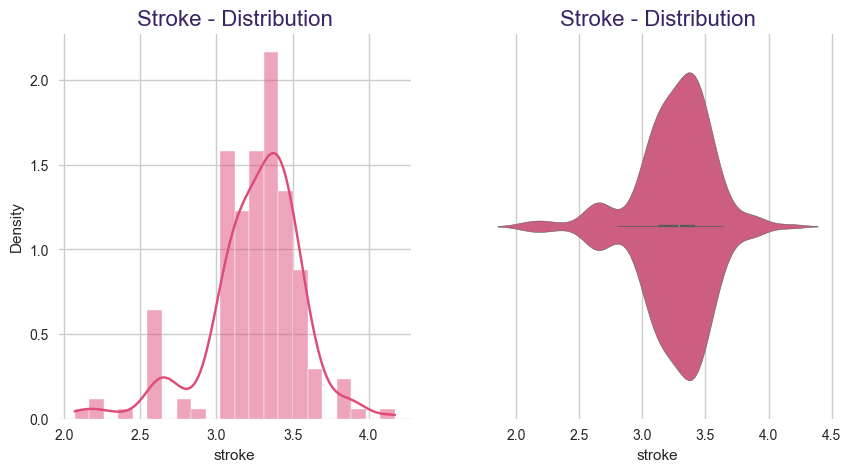

In [38]:
fig9, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig9.patch.set_alpha(0)

ax[0].set_title("Stroke - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

strokeHist = sns.histplot(x = df["stroke"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Stroke - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
strokeViol = sns.violinplot(x = df["stroke"], color = plot_color, ax = ax[1])

#plt.show()
fig9.savefig('09storke_distribution.png', dpi = fig9.dpi, bbox_inches = 'tight')

In [39]:
print("Mode of stroke: " + str(df["stroke"].mode()[0]))
print("Median of stroke:  " + str(df["stroke"].median()))
print(df["stroke"].describe())

Mode of stroke: 3.4
Median of stroke:  3.29
count    179.000000
mean       3.257151
std        0.307979
min        2.070000
25%        3.130000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64


Majority of the values here falls between 3.13 and 3.41 (the quartiles). Important to note, that the curve sharply falls outside of the interquartile range. There are also quite a few outliers. 

### Horsepower

Horsepower of an engine determines how quicly can the given car reach top speed form 0. It's a crucial performance metric of any given car.

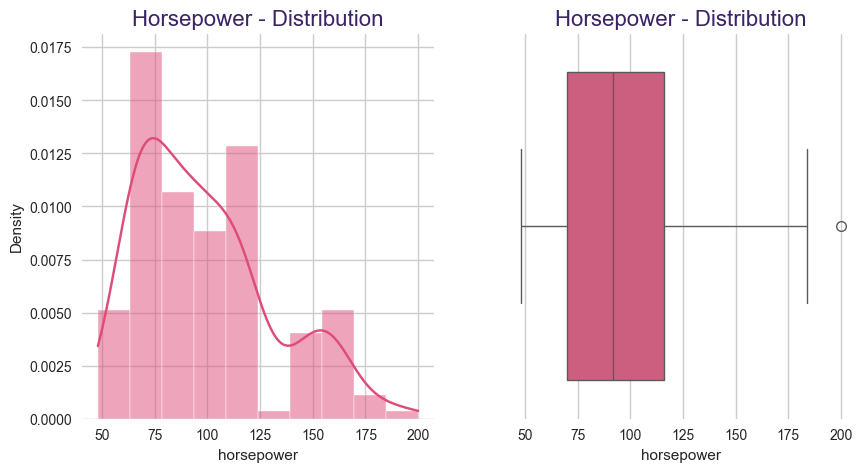

In [40]:
fig10, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig10.patch.set_alpha(0)

ax[0].set_title("Horsepower - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

hpHist = sns.histplot(x = df["horsepower"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Horsepower - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
hpBox = sns.boxplot(x = df["horsepower"], color = plot_color, ax = ax[1])

#plt.show()
fig10.savefig('10horsepower_distribution.png', dpi = fig10.dpi, bbox_inches = 'tight')

In [41]:
print("Mode:" + str(df["horsepower"].mode()[0]))
print("Median:" + str(df["horsepower"].median()))

print(df["horsepower"].describe())

Mode:68
Median:92.0
count    179.000000
mean      98.810056
std       32.326072
min       48.000000
25%       70.000000
50%       92.000000
75%      116.000000
max      200.000000
Name: horsepower, dtype: float64


Horsepower, similarly to other attributes, shows a positively skewed distribution. Majority of the engines are on the lower end of power.

### City-mpg

Miles per gallon shows the fuel efficiency of the car in a city environment. (low distances, standing around in traffic jams)

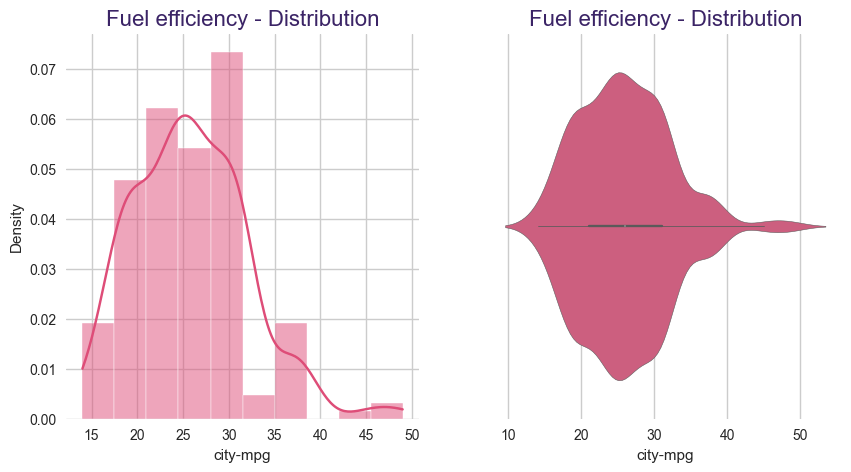

In [42]:
fig11, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig11.patch.set_alpha(0)

ax[0].set_title("Fuel efficiency - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

cityMPGHist = sns.histplot(x = df["city-mpg"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Fuel efficiency - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
cityMPGViol = sns.violinplot(x = df["city-mpg"], color = plot_color, ax = ax[1])

#plt.show()
fig11.savefig('11citympg_distribution.png', dpi = fig11.dpi, bbox_inches = 'tight')

In [43]:
print("Mode:" + str(df["city-mpg"].mode()[0]))
print("Median:" + str(df["city-mpg"].median()))

print(df["city-mpg"].describe())

Mode:31
Median:26.0
count    179.000000
mean      25.865922
std        6.258828
min       14.000000
25%       21.000000
50%       26.000000
75%       31.000000
max       49.000000
Name: city-mpg, dtype: float64


There is an interestingly high density arounf the 3rd quantile and a sharp fall-off after. Some outliers towards the higher end.

### Price

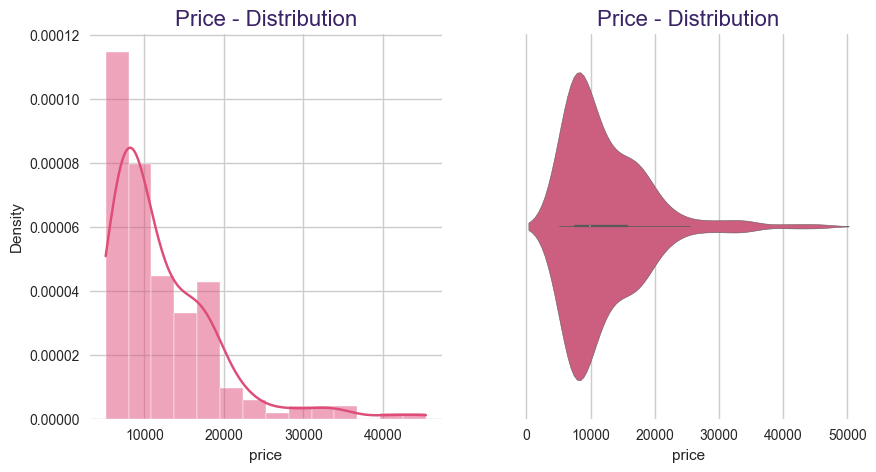

In [44]:
fig12, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig12.patch.set_alpha(0)

ax[0].set_title("Price - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

priceHist = sns.histplot(x = df["price"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Price - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
priceViol = sns.violinplot(x = df["price"], color = plot_color, ax = ax[1])

#plt.show()
fig12.savefig('12price_distribution.png', dpi = fig12.dpi, bbox_inches = 'tight')

In [45]:
print("Mode:" + str(df["price"].mode()[0]))
print("Median:" + str(df["price"].median()))

print(df["price"].describe())

Mode:5572.0
Median:9960.0
count      179.000000
mean     12247.956238
std       6771.661126
min       5118.000000
25%       7609.000000
50%       9960.000000
75%      15720.000000
max      45400.000000
Name: price, dtype: float64


Price also shows a positively skewed distribution. Most car prices are below the 10k mark. The outliers have prices upwards of 30 thousand.

### Number of cylinders

Number of cylinders determines the size of the engine, as well as it's strength. It's a categorical variable having values varying from 3 to 8.

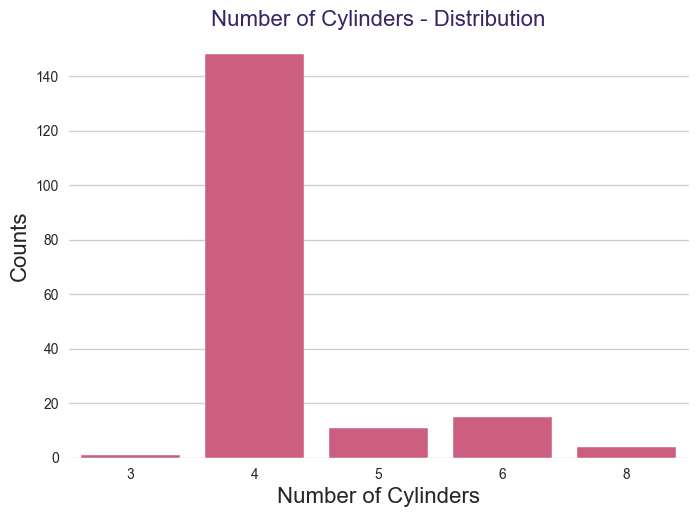

In [46]:
numbCylHist = sns.countplot(x = df['num-of-cylinders'], color = plot_color)
#symbHist.set_xticklabels(symbHist.get_xticklabels(), rotation = 90)
numbCylHist.set_xlabel('Number of Cylinders', fontsize = 16)
numbCylHist.set_ylabel('Counts', fontsize = 16)

ax = numbCylHist.axes
ax.patch.set_alpha(0)
ax.set_title('Number of Cylinders - Distribution', y = y_title_margin, fontsize = 16, color = title_color)

fig13 = numbCylHist.get_figure()
fig13.patch.set_alpha(0)
fig13.savefig('13number-of-cyl_distribution.png', dpi = fig13.dpi, bbox_inches = 'tight')

In [47]:
print("Mode:" + str(df["num-of-cylinders"].mode()[0]))
print("Median:" + str(df["num-of-cylinders"].median()))

print(df["num-of-cylinders"].describe())

Mode:4
Median:4.0
count    179.000000
mean       4.312849
std        0.815856
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: num-of-cylinders, dtype: float64


We can easily conclude, that 4 cylinder engines are by far the most common amongst the cars in the dataset.

### Curb weight

Curb weight is the total weight of a car with all standard equipments (e.g. engine oil, fuels, refrigerent, but not passangers or luggage).

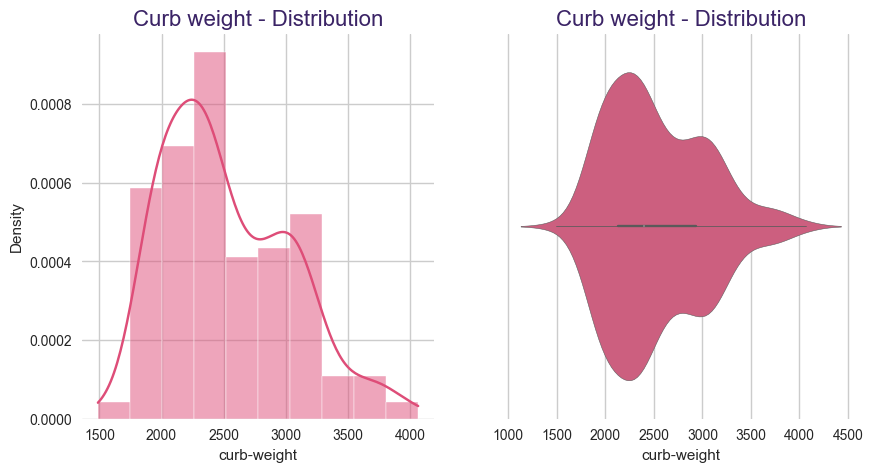

In [48]:
fig14, ax = plt.subplots(figsize = (10,5), ncols = 2, nrows = 1) 

fig14.patch.set_alpha(0)

ax[0].set_title("Curb weight - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[0].patch.set_alpha(0.5)

curbWeightHist = sns.histplot(x = df["curb-weight"], color = plot_color, ax = ax[0], kde = True, stat = "density")
#normLossHist.set_xlabel('Normalized Losses', fontsize = 16)

ax[1].set_title("Curb weight - Distribution", y = y_title_margin, color = title_color, fontsize = 16)
ax[1].patch.set_alpha(0.5)
curbWeightViol = sns.violinplot(x = df["curb-weight"], color = plot_color, ax = ax[1])

#plt.show()
fig14.savefig('14curb_weight_distribution.png', dpi = fig14.dpi, bbox_inches = 'tight')

In [49]:
print("Mode:" + str(df["curb-weight"].mode()[0]))
print("Median:" + str(df["curb-weight"].median()))

print(df["curb-weight"].describe())

Mode:1918
Median:2403.0
count     179.000000
mean     2525.284916
std       510.701041
min      1488.000000
25%      2125.000000
50%      2403.000000
75%      2930.500000
max      4066.000000
Name: curb-weight, dtype: float64


Generally speaking the cars in the dataset tend to be a bit under the average in weight.

## Multiclass classification

Trying to predict the safety category of a car seems to be the most sensical thing to do, both because it is the most life-like and because it is a multiclass (from -2 to 3) target attribute.

Let's start with choosing the right columns for our learnings. For that we want to look at correlation matrix.

<Axes: >

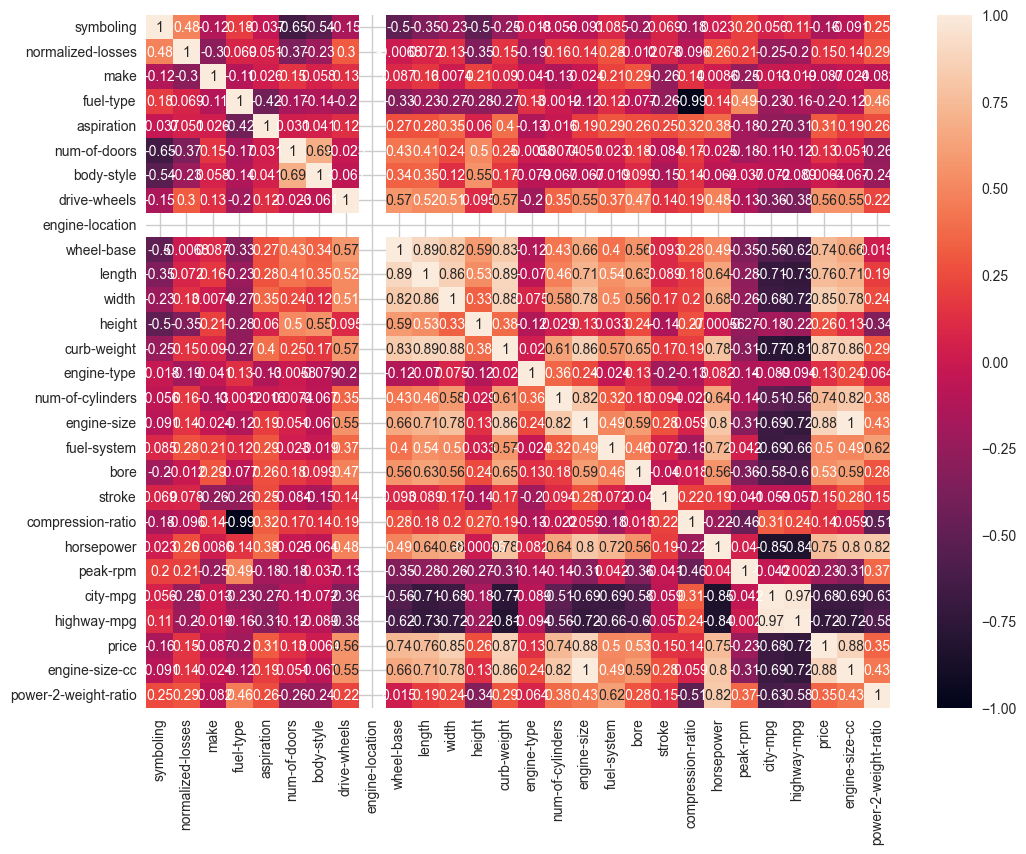

In [50]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

for col in df:
    if df[col].dtype == 'O':
        df[col] = encoder.fit_transform(df[col].values.reshape(-1,1))
#df

corr = df.corr()
fig, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr, vmax = 1, vmin = -1, annot = True)

So what we can see, is that
1. It's huge and hard to read
2. Engine location is empty, beacuse it was a single value of "front" for all instances, that gets transformed to 0, thus unsuitable to calculate correlation.
3. There are a few columns with really high correlation, such as city-mpg and highway-mpg
4. We still have some columns derived frome eachother, thus have a high correlation, like engine-size and engine-size-cc

So let's reduce the number of columns, by using one of two when they are highly correlated.

                engine-size-cc  engine-size
engine-size-cc             1.0          1.0
engine-size                1.0          1.0
                   fuel-type  compression-ratio
fuel-type           1.000000          -0.986285
compression-ratio  -0.986285           1.000000
             city-mpg  highway-mpg
city-mpg     1.000000     0.971249
highway-mpg  0.971249     1.000000
              length  wheel-base
length      1.000000    0.893226
wheel-base  0.893226    1.000000
                engine-size-cc     price
engine-size-cc        1.000000  0.880225
price                 0.880225  1.000000


<Axes: >

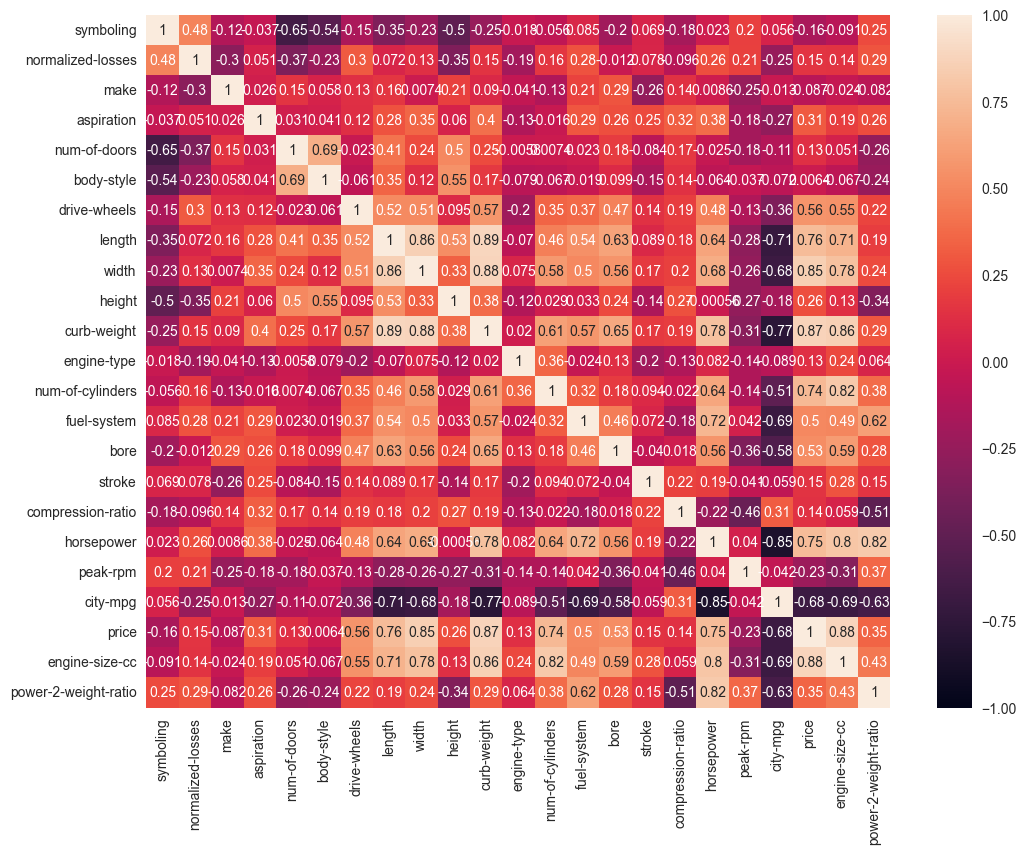

In [51]:
corr1 = df[["engine-size-cc", "engine-size"]].corr() #complitely linear so 1 of them is enough
corr2 = df[["fuel-type", "compression-ratio"]].corr() #almost completely linear, so 1 of them is enough
corr3 = df[["city-mpg", "highway-mpg"]].corr() #almost completely linear, so 1 of them is enough
corr4 = df[["length","wheel-base"]].corr() # kind of suprising, how highly these are correlated with width aswell, so we use 2 out of 3
corr5 = df[["engine-size-cc","price"]].corr() # This is a tough one; Price has the highest colleration to engine size, but shows high collerations to many other attributes
print(corr1)
print(corr2)
print(corr3)
print(corr4)
print(corr5)

symbolingDf = df.drop(["engine-size", "fuel-type", "highway-mpg", "engine-location", "wheel-base"], axis = 1)
fig, ax = plt.subplots(figsize = (12,9))
sns.heatmap(symbolingDf.corr(), vmax = 1, vmin = -1, annot = True)

This is much better, at least in terms of readability. We still have some highly correlating columns left, like curb-weight, price and engine-size-cc, but in fear of losing too much information, I'll leave these in, should the models perform badly I'll retry after omitting.

Now that we have tha data in a form we can quite nicely work with, let's start classifications;

### Kth nearest neighbour

In [52]:
# KNN
from sklearn.model_selection import train_test_split

X = symbolingDf.drop("symboling", axis = 1)
y = symbolingDf["symboling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 69)

In [53]:
#Let's get to hyperparameter optimising, as KNN has 2 hyperparameters, being the number of neighbours and the l_p norm we are using.
# Also we optimise this, as it is really hard to see it in plots.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyper_params = {
                'n_neighbors': range(1,16),
                'p':range(1,5)
               }


grid = GridSearchCV(KNeighborsClassifier(), hyper_params)
grid.fit(X_train, y_train)

grid.best_params_
# Here we can see we run into an intereseting problem, that the least populated class in y has, but 2 members,
# thus really strongly limiting our potential choices of hyperparams.


c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'n_neighbors': 2, 'p': 1}

In [54]:
# Let's see how we perform with our hyperparams
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'], p = grid.best_params_['p'])
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.30      0.30      0.30        10
           0       0.31      0.36      0.33        14
           1       0.50      0.56      0.53        16
           2       0.25      0.11      0.15         9
           3       0.00      0.00      0.00         5

    accuracy                           0.33        54
   macro avg       0.23      0.22      0.22        54
weighted avg       0.33      0.33      0.32        54



c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

As we can see, the performance is ....suboptimal. This mainly comes down to the fact, that both "edge cases", aka the "-2" and the "3" class are relatively underpopulated compared to the others. (This means that the model's performance is incredibly heavily reliant on the actual train-test split.) This can be solved by oversampling them for example, but duplicates may also work with the incredibly high risk of overfitting.

We can see how that performs.

In [55]:
from sklearn.utils import resample

def BalanceDecider(b):
    if b in [-1, 0, 1, 2]:
         return 1
    elif b == -2:
         return 0
    else:
         return -1

symbolingDf['balance'] = [BalanceDecider(b) for b in df["symboling"]]
print(symbolingDf['balance'].value_counts())

dfMajority = symbolingDf[symbolingDf["balance"] == 1]
dfMinority1 = symbolingDf[symbolingDf["balance"] == 0]
dfMinority2 = symbolingDf[symbolingDf["balance"] == -1]

dfMinorityUpsampled1 = resample(dfMinority1,
                               replace = True,
                               n_samples = 23, # roughly half of the avg of the number of the other samples
                               random_state = 69)

dfMinorityUpsampled2 = resample(dfMinority2,
                               replace = True,
                               n_samples = 23,
                               random_state = 69)

symbolingDfUpsampled = pd.concat([dfMajority, dfMinorityUpsampled1, dfMinorityUpsampled2])
symbolingDfUpsampled
print(symbolingDfUpsampled["balance"].value_counts())

balance
 1    158
-1     18
 0      3
Name: count, dtype: int64
balance
 1    158
 0     23
-1     23
Name: count, dtype: int64


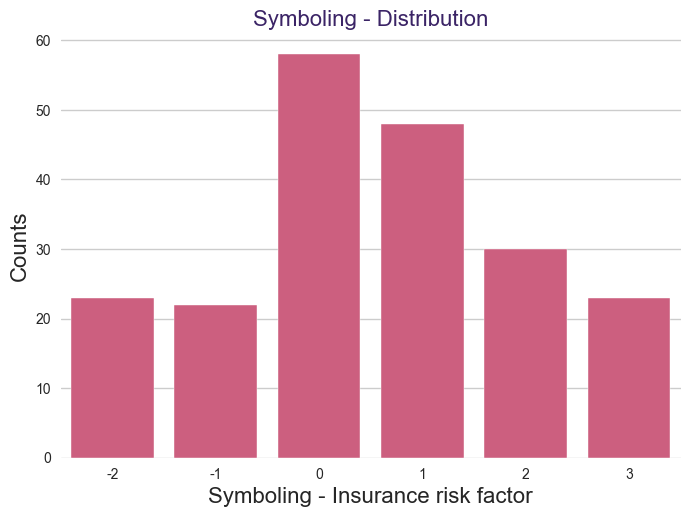

In [56]:
symbHist = sns.countplot(x = symbolingDfUpsampled['symboling'], color = plot_color)
#symbHist.set_xticklabels(symbHist.get_xticklabels(), rotation = 90)
symbHist.set_xlabel('Symboling - Insurance risk factor', fontsize = 16)
symbHist.set_ylabel('Counts', fontsize = 16)

ax = symbHist.axes
ax.patch.set_alpha(0)
ax.set_title('Symboling - Distribution', y = y_title_margin, fontsize = 16, color = title_color)

fig22 = symbHist.get_figure()
fig22.patch.set_alpha(0)
fig22.savefig('22symboling_distribution.png', dpi = fig2.dpi, bbox_inches = 'tight')

Here we can see now that our data looks more balanced.

In [57]:
symbolingDfUpsampled.drop("balance", axis = 1, inplace = True)


In [58]:
X = symbolingDfUpsampled.drop("symboling", axis = 1)
y = symbolingDfUpsampled["symboling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 69)

In [59]:
hyper_params = {
                'n_neighbors': range(1,23),
                'p':range(1,23)
               }


grid = GridSearchCV(KNeighborsClassifier(), hyper_params)
grid.fit(X_train, y_train)

grid.best_params_

{'n_neighbors': 1, 'p': 1}

In [60]:
knn_model = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'], p = grid.best_params_['p'])
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         7
          -1       0.60      0.67      0.63         9
           0       0.71      0.53      0.61        19
           1       0.41      0.58      0.48        12
           2       0.17      0.11      0.13         9
           3       0.50      0.67      0.57         6

    accuracy                           0.56        62
   macro avg       0.57      0.59      0.57        62
weighted avg       0.57      0.56      0.56        62



After the resampling of minority classes and hyperparameter optimizing with that, we get an accuracy of 56% (avg f1-score). This means it is not worth to invert the model, but it isn't great, isn't terrible.
As we can see it did overfit for classifying -2. The performance may improve if we also oversampled the -1 class a little, as well as undersampling the majority classes.

Let's see a different model:

### Naive Bayes classification

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold

X = symbolingDf.drop("symboling", axis = 1)
y = symbolingDf["symboling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.50      0.67      0.57         3
           0       1.00      0.50      0.67        16
           1       0.71      0.75      0.73        16
           2       0.31      0.57      0.40         7
           3       1.00      1.00      1.00         2

    accuracy                           0.64        45
   macro avg       0.75      0.75      0.73        45
weighted avg       0.75      0.64      0.66        45



This performs suprisingly well? Well, that's because we have a lucky split. If we play around with other random states, we can see, that the average accuracy can drop significantly, or the class of "-2" not to show up at all.

Our problems once again come from the underpopulated classes, once again we can see how the model performs once we solve that problem. This time we try K-folds.

In [62]:

from sklearn.preprocessing import PowerTransformer

cv_method = RepeatedStratifiedKFold(n_splits = 15, 
                                    n_repeats = 5, 
                                    random_state=69)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test)
gs_NB.best_score_

Fitting 75 folds for each of 100 candidates, totalling 7500 fits


c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=15.
  warnings.warn(
c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\s

np.float64(0.5644444444444445)

The model performs barely better than 54% percent and performs worse, than a lucky sampling, which is interesting, but also reasonable.

Let's see our last approach for classification of this kind.

### Decesion Tree Classifier


In [63]:
from sklearn.tree import DecisionTreeClassifier

X = symbolingDf.drop("symboling", axis = 1)
y = symbolingDf["symboling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [64]:
dt_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 12, random_state = 69)

dt = dt_tree.fit(X_train, y_train)

y_pred = dt.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       1.00      0.67      0.80         3
           0       0.86      0.75      0.80        16
           1       0.81      0.81      0.81        16
           2       0.40      0.57      0.47         7
           3       1.00      1.00      1.00         2

    accuracy                           0.76        45
   macro avg       0.84      0.80      0.81        45
weighted avg       0.79      0.76      0.77        45



As our main goal in classification is still accuracy, we are doing the best so far. 76% is still not great, but it is in the right direction and much stronger then the previous 2 models were, even with hperparameter tuning and oversampling/k-folds.

### Checking if we lost data
Now that we found a good model, let's see if we lost anything by removing highly correlated columns.

In [65]:
# Only drop the columns that are derived from or highly correlated with eachother.
symbolingDf2 = df.drop(["engine-size", "highway-mpg", "fuel-type"], axis = 1)


In [66]:
X = symbolingDf2.drop("symboling", axis = 1)
y = symbolingDf2["symboling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [67]:
dt_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 12, random_state = 69)

dt = dt_tree.fit(X_train, y_train)

y_pred = dt.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.67      0.67      0.67         3
           0       0.76      0.81      0.79        16
           1       0.80      0.75      0.77        16
           2       0.60      0.43      0.50         7
           3       0.50      1.00      0.67         2

    accuracy                           0.73        45
   macro avg       0.72      0.78      0.73        45
weighted avg       0.74      0.73      0.73        45



This way we get our best score, that is almost usage viable. For a cleaned dataset this small, this is a really nice performance.

## Semi-supervised(?) classification
A different approach for classification would be to use the normalized-losses as the target, as it has the most (41) missing values as we could see it in the beginning of our EDA. We can try and classify attributes based on what we have and then fill up the missing values based on the classes' group average. 

In [68]:
SeSupDf = autoDataRaw.drop("normalized-losses", axis = 1)

encoder = OrdinalEncoder()

for col in SeSupDf:
    if SeSupDf[col].dtype == 'O':
        SeSupDf[col] = encoder.fit_transform(SeSupDf[col].values.reshape(-1,1))
X = SeSupDf


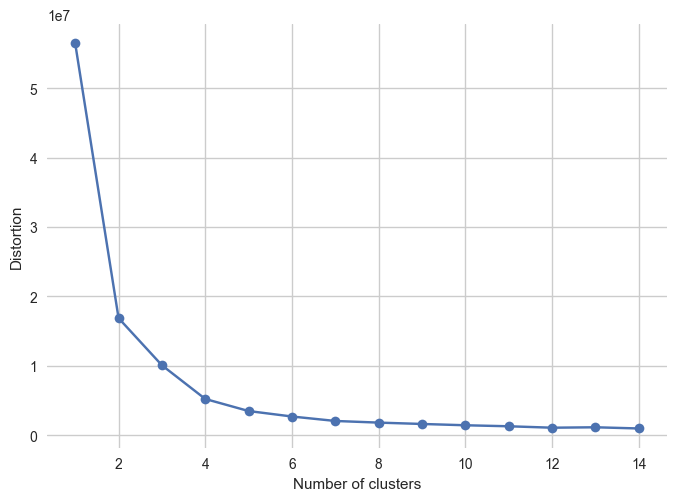

In [69]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 69)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The elbow seems to be at 4, so we can try k-means with n = 4.

In [70]:
km = KMeans(n_clusters = 4, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 69)
y_km = km.fit_predict(X)
#y_km = y_km.reshape(-1,1)
y_km

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 0, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       1, 0, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_show = np.array(X)
#X_show[y_km == 0]

scaling=StandardScaler()
scaling.fit(X_show)
Scaled_data=scaling.transform(X_show)
principal=PCA(n_components = 3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
print(x.shape)

(205, 3)


Text(0.5, 0, 'PC3')

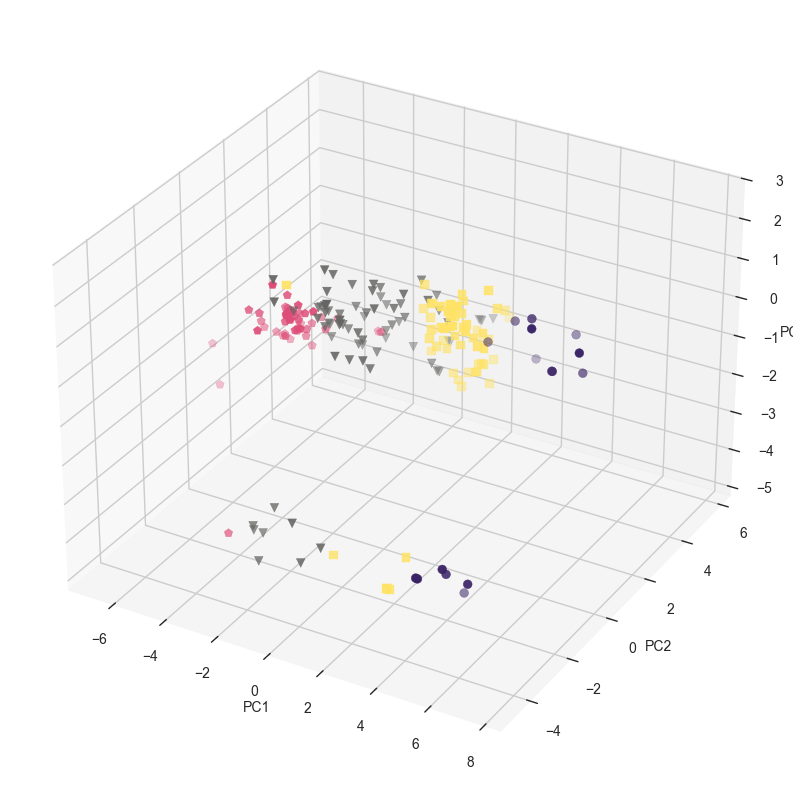

In [72]:
# Displaying the data

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')
axis.scatter(x[y_km == 0, 0], x[y_km == 0, 1], x[y_km == 0, 2], s = 40, marker = 's', c = '#ffe366', label ='Cluster 1')
axis.scatter(x[y_km == 1, 0], x[y_km == 1, 1], x[y_km == 1, 2], s = 40, marker = 'v', c = '#656663', label ='Cluster 2')
axis.scatter(x[y_km == 2, 0], x[y_km == 2, 1], x[y_km == 2, 2], s = 40, marker = 'o', c = '#3b2466', label ='Cluster 3')
axis.scatter(x[y_km == 3, 0], x[y_km == 3, 1], x[y_km == 3, 2], s = 40, marker = 'p', c = '#de4d78', label ='Cluster 4')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


By reducing dimensions for the sake of visibility we lost quite a bit of information, but sadly we can't see in 26 dimensions, so this is the closest we can get. Now that we have the clusters, let's use them, to fill out some missing data/labels.

In [73]:
# Getting the avg of each class/cluster
SeSupDf2 = autoDataRaw
SeSupDf2['normalized-losses'] = pd.to_numeric(SeSupDf2['normalized-losses'],errors='coerce')
SeSupDf2['normalized-losses-clusters'] = y_km
#SeSupDf2['normalized-losses-clusters'].describe()
SeSupDf2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses-clusters
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,0


In [74]:
# calculating means within each cluster
carsNaN2 = SeSupDf2[SeSupDf2['normalized-losses'].isnull()].groupby(by = 'normalized-losses-clusters', as_index = False).size()
carsNaN2.columns=['normalized-losses-clusters', 'nanscount']

#Collecting how many instances we have of each make/brand
carsCluster = SeSupDf2.groupby(by = 'normalized-losses-clusters', as_index = False).size()
carsCluster.columns = ['normalized-losses-clusters', 'clustercount']
carsClusterNaN = carsCluster.merge(carsNaN2, on = "normalized-losses-clusters", how = "left", suffixes = ['', '_right'])

#Finding brands that have enough non-NaN instances
#meanNaNClusters = carsClusterNaN[carsClusterNaN['nanscount'] * 100 / carsClusterNaN['clustercount'] < 50]
meanNaNClusters = carsClusterNaN
meanNaNClusters['nl2replace'] = meanNaNClusters['normalized-losses-clusters']

#Calculating mean-normalized-loss
nlCars = SeSupDf2.merge(meanNaNClusters, on = "normalized-losses-clusters", how = "left", suffixes = ['','_right'])
nlMeanBrands = nlCars.groupby(by = 'nl2replace')['normalized-losses'].mean()

#Replacing NaNs with means
carsReplace = SeSupDf2.merge(nlMeanBrands, how = "left", left_on = "normalized-losses-clusters", right_on = "nl2replace", suffixes = ['', '_right'])

#np.where(carsReplace['normalized-losses'].isnull(), carsReplace['normalized-losses_right'], carsReplace['normalized-losses'])
carsReplace['normalized-losses'] = np.where(carsReplace['normalized-losses'].isnull(), carsReplace['normalized-losses_right'], carsReplace['normalized-losses'])

SeSupDf2Clean = carsReplace.loc[carsReplace["normalized-losses"].isnull() == False].copy()

print("Count of normalized-losses after cleaning: " + str(SeSupDf2Clean['normalized-losses'].count()))
SeSupDf2Clean
#SeSupDf2Clean['normalized-losses-clusters'].describe()

Count of normalized-losses after cleaning: 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses-clusters,normalized-losses_right
0,3,117.015625,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,1,117.015625
1,3,117.015625,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,1,117.015625
2,1,136.558140,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,0,136.558140
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,1,117.015625
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,0,136.558140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,0,136.558140
201,-1,95.000000,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,0,136.558140
202,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,0,136.558140
203,-1,95.000000,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,0,136.558140


In [75]:
SeSupDf2Clean = SeSupDf2Clean.drop( "normalized-losses_right", axis = 1)
SeSupDf2Clean

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses-clusters
0,3,117.015625,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1
1,3,117.015625,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1
2,1,136.558140,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,0
201,-1,95.000000,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,0
202,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,0
203,-1,95.000000,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,0


In [76]:
# checking if the sizes of our classes are relatively similar
clusts = [0,0,0,0]
list_nlc = SeSupDf2Clean.get('normalized-losses-clusters')
for i in range(205):
    clusts[list_nlc[i]] += 1

for i in range(4):
    print("Cluster" + str(i) + " = " + str(clusts[i]))

Cluster0 = 61
Cluster1 = 75
Cluster2 = 16
Cluster3 = 53


3 of the 4 classes are similar in size, the class with the label 2 is smaller, if this makes the models perform badly we'll try oversampling it.

Let's "start over", do our remaining cleaning, and then see if we can get a model to perform in re-clustering our data

In [77]:
# normalized-losses-clusters

SeSupDf2Clean["price"] = pd.to_numeric(SeSupDf2Clean["price"], errors = 'coerce')
meanPriceClusters = SeSupDf2Clean.groupby(by =  ['normalized-losses-clusters'])['price'].mean()
meanPriceClusters = meanPriceClusters.reset_index()

#Merge to cleaned DF
SeSupDf2Clean = SeSupDf2Clean.merge(meanPriceClusters, on = 'normalized-losses-clusters', suffixes = ['', '_right'])
SeSupDf2Clean['price'] = np.where(SeSupDf2Clean['price'].isnull(), SeSupDf2Clean['price_right'], SeSupDf2Clean['price'])

In [78]:
SeSupDf2Clean['horsepower'] = pd.to_numeric(SeSupDf2Clean['horsepower'], errors = 'coerce')
#dropping unnecessary columns
del SeSupDf2Clean['price_right']
SeSupDf2Clean = SeSupDf2Clean[SeSupDf2Clean['num-of-doors'] != '?']

In [79]:
SeSupDf2Clean["num-of-doors"] = SeSupDf2Clean["num-of-doors"].apply(lambda x: convNumDoors(x))
SeSupDf2Clean["num-of-cylinders"] = SeSupDf2Clean["num-of-cylinders"].apply(lambda x: convNumCyl(x))

In [80]:
SeSupDf2Clean["engine-size-cc"] = SeSupDf2Clean["engine-size"].apply(lambda x: int(x/0.061024))
SeSupDf2Clean = SeSupDf2Clean[SeSupDf2Clean["bore"] != '?']
SeSupDf2Clean = SeSupDf2Clean[SeSupDf2Clean["stroke"] != '?']
SeSupDf2Clean = SeSupDf2Clean[SeSupDf2Clean["peak-rpm"] != '?']

SeSupDf2Clean.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price,normalized-losses-clusters,engine-size-cc
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.791878,121.763088,3.147208,98.879188,174.165990,65.913198,53.824365,2561.284264,4.436548,128.131980,10.121421,104.365482,25.365482,30.852792,13337.123629,1.309645,2099.147208
std,1.225717,32.456013,0.991626,6.105770,12.492492,2.181772,2.393170,529.971486,1.046025,41.688628,3.943426,40.152495,6.512032,6.890074,8150.692313,1.173934,683.206384
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,3.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000,0.000000,999.000000
25%,0.000000,98.000000,2.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,4.000000,98.000000,8.500000,70.000000,19.000000,25.000000,7689.000000,0.000000,1605.000000
50%,1.000000,117.015625,4.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,4.000000,120.000000,9.000000,95.000000,25.000000,30.000000,10245.000000,1.000000,1966.000000
75%,2.000000,136.558140,4.000000,102.400000,183.500000,66.900000,55.600000,2954.000000,4.000000,146.000000,9.400000,116.000000,30.000000,36.000000,16558.000000,3.000000,2392.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,23.000000,288.000000,49.000000,54.000000,45400.000000,3.000000,5342.000000


In [81]:
colsListNew = list(SeSupDf2Clean.columns)
for col in colsListNew:
    if('?' in SeSupDf2Clean[col].value_counts()):
        print(col + " - " + str(autoDataRaw[col].value_counts()['?']))

In [82]:
# Using Ordinal encoder, so our classifier actual wants to work
encoder = OrdinalEncoder()

for col in SeSupDf2Clean:
    if SeSupDf2Clean[col].dtype == 'O':
        SeSupDf2Clean[col] = encoder.fit_transform(SeSupDf2Clean[col].values.reshape(-1,1))

In [83]:
# dropping the highly correlated columns
SeSupDf2Clean = SeSupDf2Clean.drop(["engine-size", "highway-mpg", "fuel-type"], axis = 1)

Now we apply our best performing model so far: 

### Decision Tree Classifier

In [84]:
X = SeSupDf2Clean.drop("normalized-losses-clusters", axis = 1)
y = SeSupDf2Clean["normalized-losses-clusters"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# With random_state = 69 we can get a 100% accuracy, but that is in general missleading

In [85]:
dt_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 69)

dt = dt_tree.fit(X_train, y_train)

y_pred = dt.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.89      1.00      0.94        17
           2       1.00      1.00      1.00         4
           3       1.00      0.92      0.96        12

    accuracy                           0.96        50
   macro avg       0.97      0.96      0.97        50
weighted avg       0.96      0.96      0.96        50



That performed well!
Let's see, what happens if we optimise our hyper parameters further:

In [86]:
hyper_params = {
                'criterion': ['gini', 'entropy', 'log_loss'],
                'splitter' : ['best', 'random'],
                'max_depth': range(1, 10)
                }

grid = GridSearchCV(DecisionTreeClassifier(), hyper_params)
grid.fit(X_train, y_train)

c:\Users\Prágai Bálint\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 10),
                         'splitter': ['best', 'random']})

In [87]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

### A splendid performance!

Turns out we've been using the best hyperparameters from the start (the default value of splitter is 'best').

We managed to create labels in a way, that allowed us, to reclassify our data accurately. As we are doing multi-class classification now, our main performance metric is accuracy, measured by the f1-score.

As we can see form the table above, the model performed great on all classes, performing worst at classifying class 1, with 94%, overall average of 96% which would be decent in real-life datasets aswell.

Let's see how 2 additional classifiers (KNN and NB) on this data and compare performances.

### KNN for classifying normalized-losses

In [88]:
# KNN
# We are going to be using the same split as we did in the classification above

hyper_params = {
                'n_neighbors': range(1,16),
                'p':range(1,5)
               }


grid = GridSearchCV(KNeighborsClassifier(), hyper_params)
grid.fit(X_train, y_train)

grid.best_params_

{'n_neighbors': 1, 'p': 1}

In [89]:
knn_model = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'], p = grid.best_params_['p'])
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.68      0.88      0.77        17
           2       0.67      1.00      0.80         4
           3       1.00      0.83      0.91        12

    accuracy                           0.78        50
   macro avg       0.80      0.83      0.79        50
weighted avg       0.81      0.78      0.78        50



Not bad, but **significantly** worse, than DTC, as much as 18% percent in f1-score.

### Naive Bayes for classifying normalized-losses

In [90]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.71      0.88      0.79        17
           2       1.00      1.00      1.00         4
           3       1.00      0.83      0.91        12

    accuracy                           0.84        50
   macro avg       0.90      0.87      0.88        50
weighted avg       0.86      0.84      0.84        50



Performed better, then KNN, without hyperparam-optimazation. Let's see what we can get if we optimize.

In [91]:
cv_method = RepeatedStratifiedKFold(n_splits = 4, 
                                    n_repeats = 5, 
                                    random_state=69)

params_NB = {'var_smoothing': np.logspace(0,-9, num = 100)}

gs_NB = GridSearchCV(estimator = gnb, 
                     param_grid = params_NB, 
                     cv = cv_method,
                     verbose = 1, 
                     scoring = 'accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test)
gs_NB.best_score_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


np.float64(0.8522435897435898)

With optimization we could bump it up to 85% accuracy, however this is still far behind our Decision Tree Classifier, with its 96%. So we can safely say our best model is just that.